<a href="https://colab.research.google.com/github/ritsika/person-identification/blob/main/InceptionNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

In [ ]:
# Set the path to your zip file
zip_path = '/content/processed_dataset.zip'

# Set the path to extract the dataset
extract_path = '/content/Dataset'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Set the path to your train, validation, and test directories
train_dir = os.path.join(extract_path, 'train')
val_dir = os.path.join(extract_path, 'validation')
test_dir = os.path.join(extract_path, 'test')

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define the paths to the directories containing the training, testing, and validation data
train_dir = '/content/Dataset/processed_dataset/train'
test_dir = '/content/Dataset/processed_dataset/test'
validation_dir = '/content/Dataset/processed_dataset/validation'


In [ ]:
# Define constants
img_width, img_height = 299, 299
num_classes = 3
batch_size = 16
epochs = 10


In [ ]:
# Load the pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [ ]:
# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 21 images belonging to 3 classes.
Found 6 images belonging to 3 classes.
Found 9 images belonging to 3 classes.


In [ ]:
# Train the model
model_fit = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/10
2/2 [==============================] - 7s 5s/step - loss: 0.1877 - accuracy: 0.9524 - val_loss: 0.4379 - val_accuracy: 0.8333
Epoch 2/10
2/2 [==============================] - 8s 4s/step - loss: 0.0688 - accuracy: 1.0000 - val_loss: 0.4801 - val_accuracy: 0.8333
Epoch 3/10
2/2 [==============================] - 7s 4s/step - loss: 0.0370 - accuracy: 1.0000 - val_loss: 0.8599 - val_accuracy: 0.6667
Epoch 4/10
2/2 [==============================] - 7s 2s/step - loss: 0.0439 - accuracy: 1.0000 - val_loss: 1.2252 - val_accuracy: 0.3333
Epoch 5/10
2/2 [==============================] - 7s 3s/step - loss: 0.0772 - accuracy: 0.9524 - val_loss: 1.3047 - val_accuracy: 0.3333
Epoch 6/10
2/2 [==============================] - 6s 2s/step - loss: 0.0773 - accuracy: 0.9524 - val_loss: 1.0883 - val_accuracy: 0.6667
Epoch 7/10
2/2 [==============================] - 7s 2s/step - loss: 0.0452 - accuracy: 1.0000 - val_loss: 0.7774 - val_accuracy: 0.6667
Epoch 8/10
2/2 [=========================

In [ ]:
# Print accuracy
accuracy = model_fit.history['accuracy']
print("Accuracy:", accuracy)

Accuracy: [0.9523809552192688, 1.0, 1.0, 1.0, 0.9523809552192688, 0.9523809552192688, 1.0, 1.0, 1.0, 0.9523809552192688]


In [ ]:
# Save the trained model
model.save('person_identification_model.h5')

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

1/1 [==============================] - 2s 2s/step - loss: 0.9572 - accuracy: 0.6667
Test loss: 0.9572495222091675
Test accuracy: 0.6666666865348816


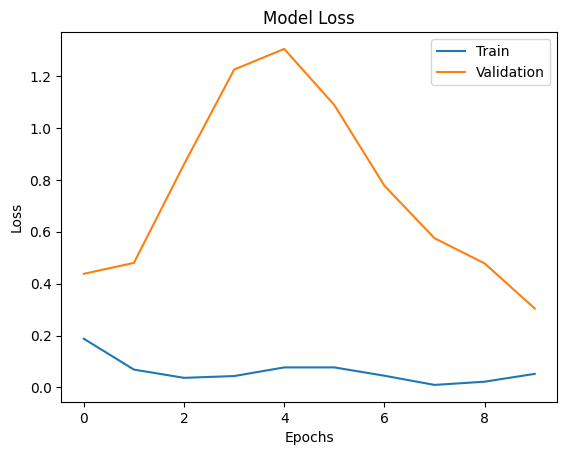

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

1/1 [==============================] - 0s 217ms/step
Predicted label: Akash


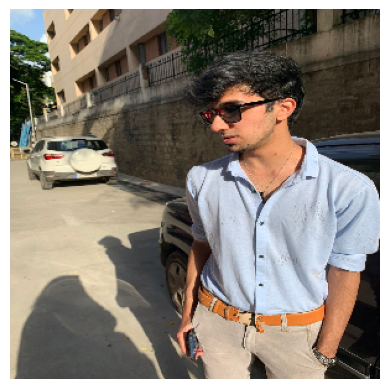

In [ ]:
# Perform model testing on individual images
test_image_path = '/content/Dataset/processed_dataset/test/Akash/image3.jpeg'  # Replace with the path to your test image
test_image = image.load_img(test_image_path, target_size=(img_width, img_height))
test_image = image.img_to_array(test_image)
test_image = preprocess_input(test_image)
test_image = tf.expand_dims(test_image, axis=0)

predictions = model.predict(test_image)
predicted_class = tf.argmax(predictions, axis=1).numpy()[0]

class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())
predicted_label = class_labels[predicted_class]

print('Predicted label:', predicted_label)
# Print the test image
rescaled_image = (test_image[0] + 1) / 2  # Rescale the image pixel values to [0, 1]
plt.imshow(rescaled_image)
plt.axis('off')
plt.show()